In [1]:
import pandas as pd

In [2]:
Point2_data= pd.read_csv('/users/aeternus/Desktop/Housing-market-in-Canada/Point2_data_Canada_house_ExcludingNorth.csv')

In [3]:
Point2_data.head()

,Beds,Bath,Sqft,Lot_Size,Type,Price,Address,Province,Region
0,3.0,1.0,1630.0,3.81,Residential,225000,1368 Forties Rd.,NS,Atlantic region
1,2.0,1.0,944.0,.826,Residential,174500,111 Lakeshore Dr.,NS,Atlantic region
2,4.0,2.0,4000.0,NaN,Residential,599000,1734 HWY 1,NS,Atlantic region
3,5.0,2.0,2721.0,>107,Residential,690000,2591 Clarence Road,NS,Atlantic region
4,15.0,6.0,6630.0,.709,Residential,495000,4616 Highway 1 Weymouth,NS,Atlantic region


In [4]:
Point2_data.tail()

,Beds,Bath,Sqft,Lot_Size,Type,Price,Address,Province,Region
52438,4.0,3.0,3335.0,.172,Single,5550000 CAD,595 W 28TH AVENUE,BC,West Coast
52439,4.0,3.0,2511.0,.239,Single,3024120 CAD,540 POIRIER STREET,BC,West Coast
52440,4.0,4.0,4753.0,>1.2,Single,5180000 CAD,20395 74B AVENUE,BC,West Coast
52441,5.0,8.0,6802.0,.293,Single,5999000 CAD,1507 PINECREST DRIVE,BC,West Coast
52442,NaN,4.0,3250.0,.171,Single,5000000 CAD,25 W KING EDWARD AVENUE,BC,West Coast


In [5]:
Point2_data.shape

(56177, 9)

### 1. Drop irrelevant columns

I don't need 'Lot-Size' and 'Type', so I will drop them.

In [4]:
Point2_data = Point2_data.drop(['Lot_Size','Type'],axis=1)

In [6]:
Point2_data.head()

,Beds,Bath,Sqft,Price,Address,Province,Region
0,3.0,1.0,1630.0,225000,1368 Forties Rd.,NS,Atlantic region
1,2.0,1.0,944.0,174500,111 Lakeshore Dr.,NS,Atlantic region
2,4.0,2.0,4000.0,599000,1734 HWY 1,NS,Atlantic region
3,5.0,2.0,2721.0,690000,2591 Clarence Road,NS,Atlantic region
4,15.0,6.0,6630.0,495000,4616 Highway 1 Weymouth,NS,Atlantic region


### 2. Get missing values and drop them

In [5]:
Point2_data.dtypes

Beds        float64
Bath        float64
Sqft        float64
Price        object
Address      object
Province     object
Region       object
dtype: object

#### 2.1 Covert "Price" columnn to float value

#### One data is recorded in USD, I use the currency rate of 1.27 to convert USD to CAD

In [6]:
Point2_data[Point2_data['Price'].str.contains("USD")]

,Beds,Bath,Sqft,Price,Address,Province,Region
9976,2.0,NaN,480.0,74000 USD,12 Kapkichi Lake,ON,Central Canada


In [7]:
74000 * 1.27

93980.0

In [8]:
Point2_data.iloc[9976,3] = "93980 CAD"

Now let's remove 'CAD' and convert to float

In [9]:
Point2_data['Price'] = Point2_data['Price'].apply(lambda x: x.replace("CAD", "")).astype(float)

In [10]:
Point2_data.dtypes

Beds        float64
Bath        float64
Sqft        float64
Price       float64
Address      object
Province     object
Region       object
dtype: object

#### 2.2 Find all the missing values

In [11]:
Point2_data.isnull().sum()

Beds         1045
Bath         1266
Sqft        14767
Price           0
Address         0
Province        0
Region          0
dtype: int64

In [12]:
Point2_data_NA = Point2_data[Point2_data.isna().any(axis=1)]

In [13]:
Point2_data_NA.shape

(15336, 7)

In [14]:
Point2_data_NA.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
52381,3.0,2.0,NaN,3499000.0,6225 PORTO RICO ROAD,BC,West Coast
52403,4.0,5.0,NaN,3300000.0,4750 LAKEHILL ROAD,BC,West Coast
52406,3.0,NaN,1830.0,2998888.0,3029 GLEN DRIVE,BC,West Coast
52436,5.0,7.0,NaN,2400000.0,2547 CANYON LISTER ROAD,BC,West Coast
52442,NaN,4.0,3250.0,5000000.0,25 W KING EDWARD AVENUE,BC,West Coast


In [18]:
Point2_data_NA_Beds = Point2_data[Point2_data['Beds'].isna()]
Point2_data_NA_Bath = Point2_data[Point2_data['Bath'].isna()]
Point2_data_NA_Sqft = Point2_data[Point2_data['Sqft'].isna()]

In [19]:
print(Point2_data_NA_Beds.shape)
print(Point2_data_NA_Bath.shape)
print(Point2_data_NA_Sqft.shape)

(1045, 7)
(1266, 7)
(14767, 7)


#### Document all the missing values

In [57]:
Point2_data_NA_Beds.to_csv('Point2_data_NA_Beds.csv',index=False)
Point2_data_NA_Bath.to_csv('Point2_data_NA_Bath.csv',index=False)
Point2_data_NA_Sqft.to_csv('Point2_data_NA_Sqft.csv',index=False)

**All the missing values need to be updated to improve the experience of customers who are using the website.**

#### 2.3 Drop the missing values of Bedrooms and Bathrooms 

In [15]:
Point2_data.dropna(subset=['Beds', 'Bath'], inplace=True)

In [16]:
Point2_data.shape

(51036, 7)

In [17]:
Point2_data_with_NaSqft = Point2_data

In [18]:
Point2_data_with_NaSqft.to_csv('Point2_data_with_NaSqft.csv',index=False)

#### 2.3.1. Replace the missing value of Sqft to the average Sqft with same size of bedrooms and bathrooms
        (Point2_data_with_NaSqft)

#### Or 

#### 2.3.2. Drop the missing value of Sqft 
        (Point2_data_without_NaSqft)

#### 1. Replace the missing value of Sqft in average Sqft of same size of bedrooms and bathrooms

There are so many factors which affect the sqft. Not only the number of bedrooms and bathrooms, but also the location of the house. 

Actually, I should make a model to estimate the Sqft, based on the number of bedrooms, the number of bathrooms, the price of the house and the location of the house. 

Later on, I will analyze them by using supervised ML. Right now, I will drop the missing value of Sqft.

#### Let's look at how much each province contributes to the missing data

In [38]:
print(Point2_data['Province'].value_counts())
print(Point2_data_NA['Province'].value_counts())

ON    12912
AB    12871
BC     8826
SK     5558
NL     2441
NB     2236
QC     2122
NS     2056
MB     1431
PE      583
Name: Province, dtype: int64
ON    11927
QC     1056
BC     1008
NB      978
AB      110
MB       67
SK       61
NS       59
PE       42
NL       28
Name: Province, dtype: int64


**After dropping missing values:**
* ON will lose most of the data 
* QC and NB will lose half of the data
* BC will lose one eighth of the data

#### What about the missing data in details

In [39]:
print(Point2_data_NA['Province'].value_counts())
print(Point2_data_NA_Sqft['Province'].value_counts())

ON    11927
QC     1056
BC     1008
NB      978
AB      110
MB       67
SK       61
NS       59
PE       42
NL       28
Name: Province, dtype: int64
ON    11863
QC     1018
NB      917
BC      753
AB       84
MB       42
PE       37
NS       36
NL       10
SK        7
Name: Province, dtype: int64


**However, if we can replace the missing value of Sqft data:**
* ON,QC,NB will get most of data back
* BC will get around 7% of the total data back

In [41]:
print(Point2_data_NA_Beds['Province'].value_counts())
print(Point2_data_NA_Bath['Province'].value_counts())

ON    482
BC    183
NB    120
AB     55
QC     52
SK     40
NS     38
MB     31
NL     23
PE     21
Name: Province, dtype: int64
ON    521
BC    339
NB    115
AB     67
QC     48
SK     47
MB     47
NS     36
NL     23
PE     23
Name: Province, dtype: int64


**But, based on the missing value of Bedrooms and Bathrooms:**
* ON still will lose around 500 data which is 1/20 of the total data.
* BC still will lose around 300 data which is 1/30 of the total data.
* NB will lose around 100 data which is 1/20 of the total data.

#### 2.3.2. Drop the missing value of Sqft

In [111]:
Point2_data_without_NaSqft = Point2_data.dropna()

In [112]:
Point2_data_without_NaSqft.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
52437,5.0,3.0,3700.0,11000000.0,4664 192 STREET,BC,West Coast
52438,4.0,3.0,3335.0,5550000.0,595 W 28TH AVENUE,BC,West Coast
52439,4.0,3.0,2511.0,3024120.0,540 POIRIER STREET,BC,West Coast
52440,4.0,4.0,4753.0,5180000.0,20395 74B AVENUE,BC,West Coast
52441,5.0,8.0,6802.0,5999000.0,1507 PINECREST DRIVE,BC,West Coast


In [113]:
Point2_data_without_NaSqft.shape

(37107, 7)

In [114]:
Point2_data_without_NaSqft = Point2_data_without_NaSqft.reset_index().drop(['index'], axis=1)

In [115]:
Point2_data_without_NaSqft.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
37102,5.0,3.0,3700.0,11000000.0,4664 192 STREET,BC,West Coast
37103,4.0,3.0,3335.0,5550000.0,595 W 28TH AVENUE,BC,West Coast
37104,4.0,3.0,2511.0,3024120.0,540 POIRIER STREET,BC,West Coast
37105,4.0,4.0,4753.0,5180000.0,20395 74B AVENUE,BC,West Coast
37106,5.0,8.0,6802.0,5999000.0,1507 PINECREST DRIVE,BC,West Coast


**ON lose huge amount of data when dropping the missing value of Sqft**

In [116]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Province']=='ON'].shape

(1538, 7)

### 3. Get duplicated values and drop them

In [117]:
Point2_data_without_NaSqft.shape

(37107, 7)

#### 3.1 Find Duplicate values

In [118]:
Point2_data_duplicated = Point2_data_without_NaSqft[Point2_data_without_NaSqft.duplicated(keep='last')]

In [119]:
Point2_data_duplicated.shape

(389, 7)

In [120]:
Point2_data_duplicated.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
34742,8.0,4.0,3630.0,5500000.0,3290 DUMFRIES STREET,BC,West Coast
35140,10.0,6.0,5150.0,3299000.0,4311 4313 ALBERT STREET,BC,West Coast
35390,8.0,6.0,5582.0,3499000.0,120 BIRCH AVE,BC,West Coast
35473,1.0,1.0,224.0,2200000.0,DL 625 HEAD BAY Rd,BC,West Coast
37058,2.0,1.0,1250.0,2850000.0,101 South St,BC,West Coast


Save duplicated values to check

In [121]:
Point2_data_duplicated.to_csv('Point2_data_duplicated.csv',index=False)

Double check whether the duplicate values are correct.

In [122]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Address']=='34 Holmes Lane ']

,Beds,Bath,Sqft,Price,Address,Province,Region
2307,3.0,2.0,1500.0,455000.0,34 Holmes Lane,PE,Atlantic region
2560,3.0,2.0,1500.0,455000.0,34 Holmes Lane,PE,Atlantic region


**Those duplicated values need to be removed from website and free the storge of data**

#### 3.2 Drop Duplicate values

In [123]:
Point2_data_without_NaSqft = Point2_data_without_NaSqft.drop_duplicates()

In [124]:
Point2_data_without_NaSqft.shape

(36718, 7)

In [125]:
Point2_data_without_NaSqft = Point2_data_without_NaSqft.reset_index().drop(['index'], axis=1)

In [126]:
Point2_data_without_NaSqft.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
36713,5.0,3.0,3700.0,11000000.0,4664 192 STREET,BC,West Coast
36714,4.0,3.0,3335.0,5550000.0,595 W 28TH AVENUE,BC,West Coast
36715,4.0,3.0,2511.0,3024120.0,540 POIRIER STREET,BC,West Coast
36716,4.0,4.0,4753.0,5180000.0,20395 74B AVENUE,BC,West Coast
36717,5.0,8.0,6802.0,5999000.0,1507 PINECREST DRIVE,BC,West Coast


In [207]:
#Point2_data_without_NaSqft.to_csv('Point2_data_without_NaSqft.csv',index=False)

In [19]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.drop_duplicates()

In [20]:
Point2_data_with_NaSqft.shape

(50427, 7)

In [21]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.reset_index().drop(['index'], axis=1)

In [22]:
Point2_data_with_NaSqft.tail()

,Beds,Bath,Sqft,Price,Address,Province,Region
50422,5.0,3.0,3700.0,11000000.0,4664 192 STREET,BC,West Coast
50423,4.0,3.0,3335.0,5550000.0,595 W 28TH AVENUE,BC,West Coast
50424,4.0,3.0,2511.0,3024120.0,540 POIRIER STREET,BC,West Coast
50425,4.0,4.0,4753.0,5180000.0,20395 74B AVENUE,BC,West Coast
50426,5.0,8.0,6802.0,5999000.0,1507 PINECREST DRIVE,BC,West Coast


In [24]:
#Point2_data_with_NaSqft.to_csv('Point2_data_with_NaSqft.csv',index=False)

### 4. Find outliers

#### 4.1 Bathrooms

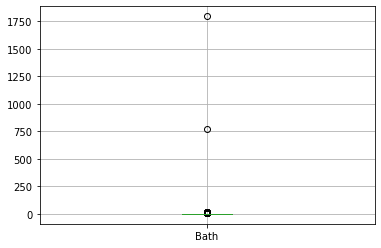

In [128]:
boxplot = Point2_data_without_NaSqft.boxplot(column=['Bath'])

In [129]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Bath']>250]

,Beds,Bath,Sqft,Price,Address,Province,Region
4468,2.0,769.0,768.0,129000.0,0 Reg Keepings Road,NL,Atlantic region
7989,2.0,1795.0,795.0,843098.0,2334 St. Paul Ave.,ON,Central Canada


These two data should be typing errors, let's try some small numbers

In [146]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Bath']>15]

,Beds,Bath,Sqft,Price,Address,Province,Region
649,16.0,19.0,11724.0,1795000.0,150 Cumberland Street,NS,Atlantic region
2574,3.0,21.0,2400.0,459000.0,756 Route 148,NB,Atlantic region
4468,2.0,769.0,768.0,129000.0,0 Reg Keepings Road,NL,Atlantic region
7989,2.0,1795.0,795.0,843098.0,2334 St. Paul Ave.,ON,Central Canada
27490,9.0,17.0,813274.0,2395000.0,944 166 AV NE,AB,Prairie Provinces


In [189]:
Point2_data_outliers_Bath= Point2_data_without_NaSqft[Point2_data_without_NaSqft['Bath']>20]

In [192]:
Point2_data_outliers_Bath

,Beds,Bath,Sqft,Price,Address,Province,Region
0,3.0,21.0,2400.0,459000.0,756 Route 148,NB,Atlantic region
1,2.0,769.0,768.0,129000.0,0 Reg Keepings Road,NL,Atlantic region
2,2.0,1795.0,795.0,843098.0,2334 St. Paul Ave.,ON,Central Canada


In [149]:
Point2_data_outliers_Bath.to_csv('Point2_data_outliers_Bath.csv',index=False)

These three data should be typing errors

Drop those outliers

In [150]:
Point2_data_without_NaSqft = Point2_data_without_NaSqft.drop([2574,4468,7989])

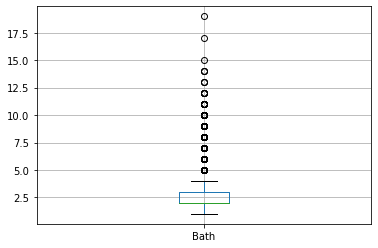

In [151]:
boxplot = Point2_data_without_NaSqft.boxplot(column=['Bath'])

Those data are reasonable compared to the price.

In [25]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.drop([2574,4468,7989])

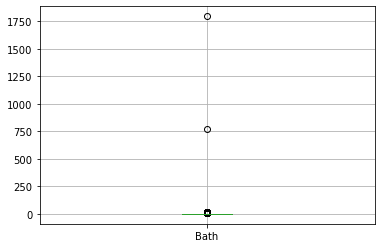

In [26]:
boxplot = Point2_data_with_NaSqft.boxplot(column=['Bath'])

In [30]:
Point2_data_with_NaSqft[Point2_data_with_NaSqft['Bath']>20]

,Beds,Bath,Sqft,Price,Address,Province,Region
2638,3.0,21.0,2400.0,459000.0,756 Route 148,NB,Atlantic region


In [28]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.drop([5342,13918])

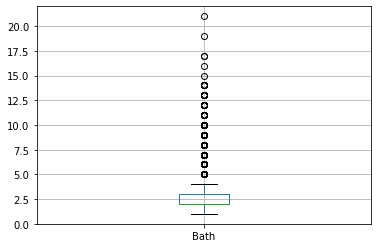

In [29]:
boxplot = Point2_data_with_NaSqft.boxplot(column=['Bath'])

#### 4.2 Bedrooms

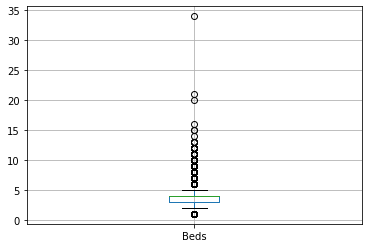

In [153]:
boxplot = Point2_data_without_NaSqft.boxplot(column=['Beds'])

In [154]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Beds']>15]

,Beds,Bath,Sqft,Price,Address,Province,Region
649,16.0,19.0,11724.0,1795000.0,150 Cumberland Street,NS,Atlantic region
26336,34.0,3.0,2105.0,818850.0,2425 22A Street NW,AB,Prairie Provinces
35781,20.0,11.0,11375.0,14000000.0,230 Smith Rd,BC,West Coast
35993,21.0,7.0,7670.0,3998000.0,1420-1430 NAPIER STREET,BC,West Coast


The 34-bedroom house is not realistic.

In [187]:
Point2_data_outliers_Bed = Point2_data_without_NaSqft.loc[26336,:]

In [188]:
Point2_data_outliers_Bed

Beds                       34.0
Bath                        3.0
Sqft                     2105.0
Price                  818850.0
Address     2425 22A Street NW 
Province                     AB
Region        Prairie Provinces
Name: 26336, dtype: object

Drop the outlier

In [194]:
Point2_data_outliers_Bed.to_csv('Point2_data_outliers_Bed.csv',index=False)

In [193]:
Point2_data_without_NaSqft = Point2_data_without_NaSqft.drop([26336])

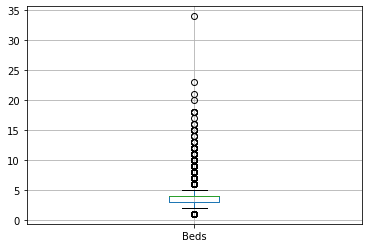

In [33]:
boxplot = Point2_data_with_NaSqft.boxplot(column=['Beds'])

In [34]:
Point2_data_with_NaSqft[Point2_data_with_NaSqft['Beds']>15]

,Beds,Bath,Sqft,Price,Address,Province,Region
650,16.0,19.0,11724.0,1795000.0,150 Cumberland Street,NS,Atlantic region
3014,16.0,8.0,NaN,1965000.0,122 Route 4104,NB,Atlantic region
7925,18.0,2.0,NaN,399000.0,334 Route des Cantons,QC,Central Canada
8454,16.0,5.0,NaN,369900.0,4 Rue Bellevue,QC,Central Canada
18338,23.0,1.0,NaN,1350000.0,135 Cedar Crest Beach Rd,ON,Central Canada
19532,18.0,8.0,NaN,1899900.0,208-216 DIVISION ST,ON,Central Canada
20309,18.0,6.0,NaN,1750000.0,36-38 Noecker St,ON,Central Canada
21042,17.0,14.0,NaN,12880000.0,13231 KENNEDY RD,ON,Central Canada
21432,18.0,7.0,NaN,3499900.0,435/437 KINGSTON RD,ON,Central Canada
21449,18.0,7.0,NaN,14500000.0,1 HAY ISLAND RD,ON,Central Canada


In [35]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.drop([18338,26336])

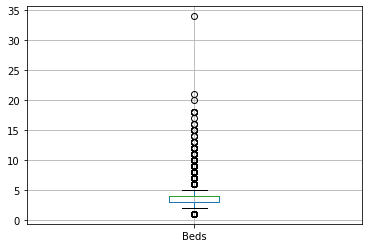

In [36]:
boxplot = Point2_data_with_NaSqft.boxplot(column=['Beds'])

#### 4.3 Sqft

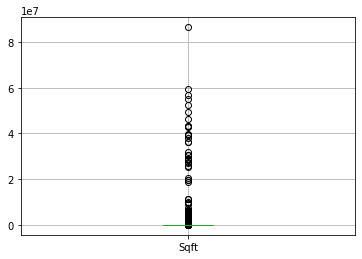

In [196]:
boxplot = Point2_data_without_NaSqft.boxplot(column=['Sqft'])

In [201]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Sqft']>75000000]

,Beds,Bath,Sqft,Price,Address,Province,Region
35369,7.0,3.0,86445684.0,6900000.0,24375 80 AVENUE,BC,West Coast


No outlier is found

#### 4.4 Price

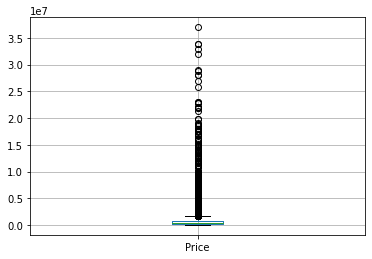

In [204]:
boxplot = Point2_data_without_NaSqft.boxplot(column=['Price'])

In [205]:
Point2_data_without_NaSqft[Point2_data_without_NaSqft['Sqft']>35000000]

,Beds,Bath,Sqft,Price,Address,Province,Region
32376,6.0,5.0,39277836.0,1399999.0,32727 UNGER COURT,BC,West Coast
33301,6.0,6.0,39859092.0,1720000.0,12782 59A AVENUE,BC,West Coast
33590,6.0,6.0,49342176.0,1650000.0,30530 BLUERIDGE DRIVE,BC,West Coast
33751,6.0,6.0,43411212.0,1949000.0,7729 211 STREET,BC,West Coast
33941,6.0,6.0,37975392.0,1999000.0,16675 21 AVENUE,BC,West Coast
33987,7.0,4.0,43152876.0,1698000.0,9650 QUEENS PLACE,BC,West Coast
34156,5.0,6.0,52592904.0,1998800.0,16799 16A AVENUE,BC,West Coast
34888,7.0,7.0,42603912.0,2099000.0,16697 18B AVENUE,BC,West Coast
34906,6.0,4.0,46199088.0,2200000.0,21543 45A AVENUE,BC,West Coast
35046,7.0,6.0,59341932.0,2239900.0,7764 166A STREET,BC,West Coast


No outlier is found

In [208]:
Point2_data_without_NaSqft.to_csv('Point2_data_without_NaSqft.csv',index=False)

In [37]:
Point2_data_with_NaSqft = Point2_data_with_NaSqft.reset_index().drop(['index'], axis=1)

In [38]:
Point2_data_with_NaSqft.to_csv('Point2_data_without_NaSqft.csv',index=False)